In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split

Pisahkan keseluruhan data menjadi data pelatihan sebanyak 75% dan data tes 
sebanyak 25%. Baik untuk data pelatihan dan data tes harus dibagi secara proporsional 
untuk masing-masing kelas label menggunakan *stratified sampling*. Tunjukkan statistik 
dari hasil pemisahan data tersebut.

In [3]:
train_df = pd.read_csv('app_train_cleaned_encoded.csv')
test_df = pd.read_csv('app_test_cleaned_encoded.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(48744, 237)
(307511, 236)


In [5]:
# Misal dataset kamu ada di df
# Pisahkan fitur dan label
X = train_df.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train_df['TARGET']

# Split data menjadi train dan test 75%-25% dengan stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    stratify=y, 
    random_state=42
)

# Cek statistik hasil split
print("Jumlah data sebelum split:")
print(y.value_counts(normalize=True))
print()

print("Jumlah data setelah split:")
print("Train set:")
print(y_train.value_counts(normalize=True))
print()
print("Test set:")
print(y_test.value_counts(normalize=True))

Jumlah data sebelum split:
TARGET
0.0    0.919436
1.0    0.080564
Name: proportion, dtype: float64

Jumlah data setelah split:
Train set:
TARGET
0.0    0.919443
1.0    0.080557
Name: proportion, dtype: float64

Test set:
TARGET
0.0    0.919416
1.0    0.080584
Name: proportion, dtype: float64


In [6]:
# Statistical 

Guna memperoleh model klasifikasi terbaik untuk beberapa metode klasifikai yang harus 
diimplementasikan, gunakan keseluruhan data pelatihan menggunakan *10-fold cross 
validation*. Gunakan metode stratified sampling dalam menentukan pembagian data 
dalam 10-fold cross validation. 

#### Set up 10-fold stratified cross-validation

In [ ]:
# Set up 10-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Kfold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

train_set_kfold = []
test_set_kfold = []

for fold, (train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
    print(f"Fold {fold}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)



# Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (36558, 236)
Number transactions y_train dataset:  (36558,)
Number transactions X_test dataset:  (12186, 236)
Number transactions y_test dataset:  (12186,)


## Make the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X, y)
y_pred = dt_model.predict(X_test)

### Agregate tuning (all at once)

In [ ]:
from sklearn.model_selection import StratifiedKFold
# Setup stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# import pandas as pd
# import numpy as np

# # Simpan skor tiap fold untuk setiap parameter
# results = []

# # Parameter values to compare
# max_depth_values = [3, 5, 10, None]
# min_samples_split_values = [2, 5, 10]
# min_samples_leaf_values = [1, 2, 4]
# max_features_values = [None, 'sqrt', 'log2']
# max_leaf_nodes_values = [None, 10, 20, 50]
# criterion_values = ['gini', 'entropy']

# # Loop through all parameter combinations
# for max_depth in max_depth_values:
#     for min_samples_split in min_samples_split_values:
#         for min_samples_leaf in min_samples_leaf_values:
#             for max_features in max_features_values:
#                 for max_leaf_nodes in max_leaf_nodes_values:
#                     for criterion in criterion_values:
#                         print(f"\nEvaluating DecisionTreeClassifier with parameters: "
#                               f"max_depth={max_depth}, min_samples_split={min_samples_split}, "
#                               f"min_samples_leaf={min_samples_leaf}, max_features={max_features}, "
#                               f"max_leaf_nodes={max_leaf_nodes}, criterion={criterion}")
                        
#                         # Simpan skor tiap fold
#                         acc_scores = []
#                         prec_scores = []
#                         rec_scores = []
#                         f1_scores = []
#                         roc_auc_scores = []

#                         for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
#                             print(f"\nFold ke-{fold+1}")

#                             X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#                             y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#                             # Inisialisasi model Decision Tree
#                             dt_model = DecisionTreeClassifier(
#                                 max_depth=max_depth,
#                                 min_samples_split=min_samples_split,
#                                 min_samples_leaf=min_samples_leaf,
#                                 max_features=max_features,
#                                 max_leaf_nodes=max_leaf_nodes,
#                                 criterion=criterion,
#                                 random_state=42
#                             )

#                             # Train model
#                             dt_model.fit(X_tr, y_tr)

#                             # Predict di validation set
#                             y_pred = dt_model.predict(X_val)
#                             y_prob = dt_model.predict_proba(X_val)[:, 1]  # Probabilitas untuk AUC

#                             # Hitung metrik
#                             acc = accuracy_score(y_val, y_pred)
#                             prec = precision_score(y_val, y_pred, zero_division=0)
#                             rec = recall_score(y_val, y_pred, zero_division=0)
#                             f1 = f1_score(y_val, y_pred, zero_division=0)
#                             auc = roc_auc_score(y_val, y_prob)

#                             acc_scores.append(acc)
#                             prec_scores.append(prec)
#                             rec_scores.append(rec)
#                             f1_scores.append(f1)
#                             roc_auc_scores.append(auc)

#                         # Rata-rata kinerja di 10 Fold untuk parameter ini
#                         print(f"\n=== Rata-rata Hasil Cross Validation ===")
#                         print(f"Akurasi rata-rata: {np.mean(acc_scores):.4f}")
#                         print(f"Presisi rata-rata: {np.mean(prec_scores):.4f}")
#                         print(f"Recall rata-rata: {np.mean(rec_scores):.4f}")
#                         print(f"F1-Score rata-rata: {np.mean(f1_scores):.4f}")
#                         print(f"AUC ROC rata-rata: {np.mean(roc_auc_scores):.4f}")

#                         # Simpan hasil untuk parameter ini
#                         results.append({
#                             'max_depth': max_depth,
#                             'min_samples_split': min_samples_split,
#                             'min_samples_leaf': min_samples_leaf,
#                             'max_features': max_features,
#                             'max_leaf_nodes': max_leaf_nodes,
#                             'criterion': criterion,
#                             'mean_accuracy': np.mean(acc_scores),
#                             'mean_precision': np.mean(prec_scores),
#                             'mean_recall': np.mean(rec_scores),
#                             'mean_f1_score': np.mean(f1_scores),
#                             'mean_auc_roc': np.mean(roc_auc_scores)
#                         })

# # Tampilkan hasil perbandingan
# results_df = pd.DataFrame(results)
# print("\n=== Hasil Perbandingan Parameter ===")
# print(results_df)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(1.0)

### Tuning each parameter solely

#### Max depth


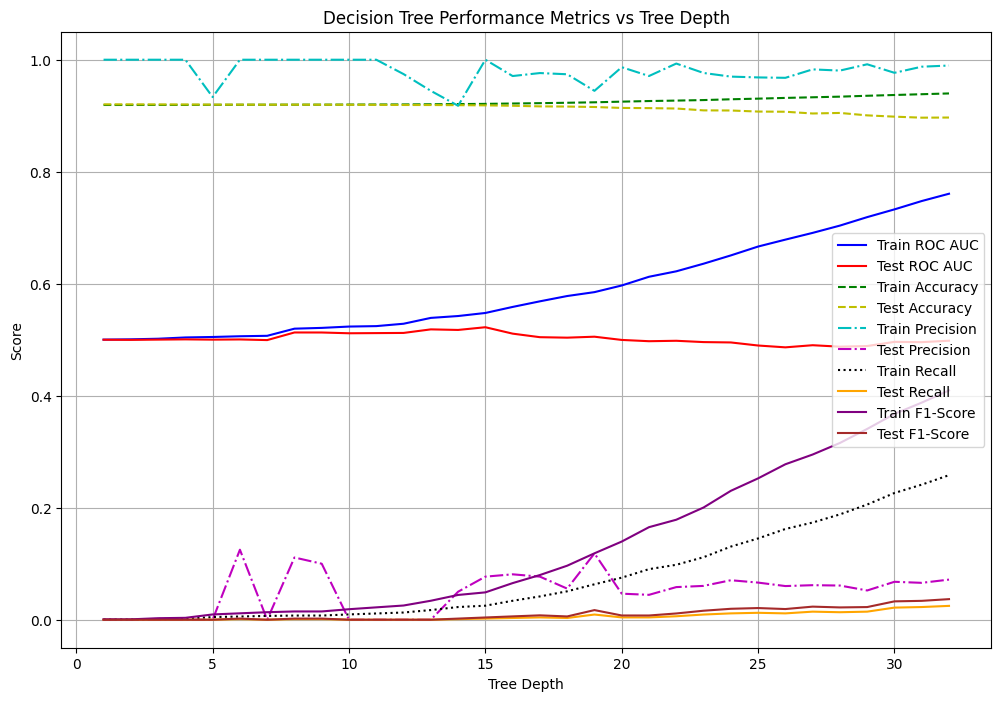

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of max_depth values
max_depths = np.linspace(1, 32, 32, endpoint=True, dtype=int)

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_depth value
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.plot(max_depths, train_results['roc_auc'], 'b', label='Train ROC AUC')
plt.plot(max_depths, test_results['roc_auc'], 'r', label='Test ROC AUC')

# Plot Accuracy
plt.plot(max_depths, train_results['accuracy'], 'g--', label='Train Accuracy')
plt.plot(max_depths, test_results['accuracy'], 'y--', label='Test Accuracy')

# Plot Precision
plt.plot(max_depths, train_results['precision'], 'c-.', label='Train Precision')
plt.plot(max_depths, test_results['precision'], 'm-.', label='Test Precision')

# Plot Recall
plt.plot(max_depths, train_results['recall'], 'k:', label='Train Recall')
plt.plot(max_depths, test_results['recall'], 'orange', label='Test Recall')

# Plot F1-Score
plt.plot(max_depths, train_results['f1'], 'purple', label='Train F1-Score')
plt.plot(max_depths, test_results['f1'], 'brown', label='Test F1-Score')

# Add labels and legend
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Tree Depth')
plt.legend(loc='best')
plt.grid()
plt.show()


[[Penjelasan]]

Dari grafik dan angka di atas, kita bisa memilih dua kombinasi terbaik dari **MAX_DEPTH**, yaitu senilai a dan b.

DT Classifier model akan memakai parameter MAX_DEPTH a dan b. Masing-masing akan dihitung akurasi, presisi, recall, f1-score, dan AUC ROC menggunakan 10-cross validation.

In [ ]:
# Define the range of max_depth values
max_depths = [14, 15]

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_depth value
for depth in max_depths:
    print(f"\nEvaluating max_depth={depth}")
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_accuracy = accuracy_score(y_tr, train_pred)
        train_precision = precision_score(y_tr, train_pred, zero_division=0)
        train_recall = recall_score(y_tr, train_pred, zero_division=0)
        train_f1 = f1_score(y_tr, train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_tr, train_prob)
        
        # Store training metrics
        train_results['accuracy'].append(train_accuracy)
        train_results['precision'].append(train_precision)
        train_results['recall'].append(train_recall)
        train_results['f1'].append(train_f1)
        train_results['roc_auc'].append(train_roc_auc)
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        val_accuracy = accuracy_score(y_val, val_pred)
        val_precision = precision_score(y_val, val_pred, zero_division=0)
        val_recall = recall_score(y_val, val_pred, zero_division=0)
        val_f1 = f1_score(y_val, val_pred, zero_division=0)
        val_roc_auc = roc_auc_score(y_val, val_prob)
        
        # Store validation metrics
        test_results['accuracy'].append(val_accuracy)
        test_results['precision'].append(val_precision)
        test_results['recall'].append(val_recall)
        test_results['f1'].append(val_f1)
        test_results['roc_auc'].append(val_roc_auc)
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")
        print(f"  Test Metrics:  Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}, ROC AUC={val_roc_auc:.4f}")

    # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating max_depth=14
Fold 1
  Train Metrics: Accuracy=0.9221, Precision=0.9709, Recall=0.0376, F1=0.0724, ROC AUC=0.5756
  Test Metrics:  Accuracy=0.9185, Precision=0.2000, Recall=0.0034, F1=0.0067, ROC AUC=0.4911
Fold 2
  Train Metrics: Accuracy=0.9229, Precision=0.9556, Recall=0.0485, F1=0.0923, ROC AUC=0.5847
  Test Metrics:  Accuracy=0.9171, Precision=0.1000, Recall=0.0034, F1=0.0066, ROC AUC=0.4942
Fold 3
  Train Metrics: Accuracy=0.9246, Precision=0.9637, Recall=0.0699, F1=0.1304, ROC AUC=0.6252
  Test Metrics:  Accuracy=0.9127, Precision=0.0400, Recall=0.0034, F1=0.0062, ROC AUC=0.4855
Fold 4
  Train Metrics: Accuracy=0.9234, Precision=0.9929, Recall=0.0526, F1=0.1000, ROC AUC=0.5784
  Test Metrics:  Accuracy=0.9144, Precision=0.0526, Recall=0.0034, F1=0.0063, ROC AUC=0.4682
Fold 5
  Train Metrics: Accuracy=0.9218, Precision=1.0000, Recall=0.0323, F1=0.0626, ROC AUC=0.5437
  Test Metrics:  Accuracy=0.9174, Precision=0.1250, Recall=0.0034, F1=0.0066, ROC AUC=0.4943
Fold 6
  T

#### Min_samples_split

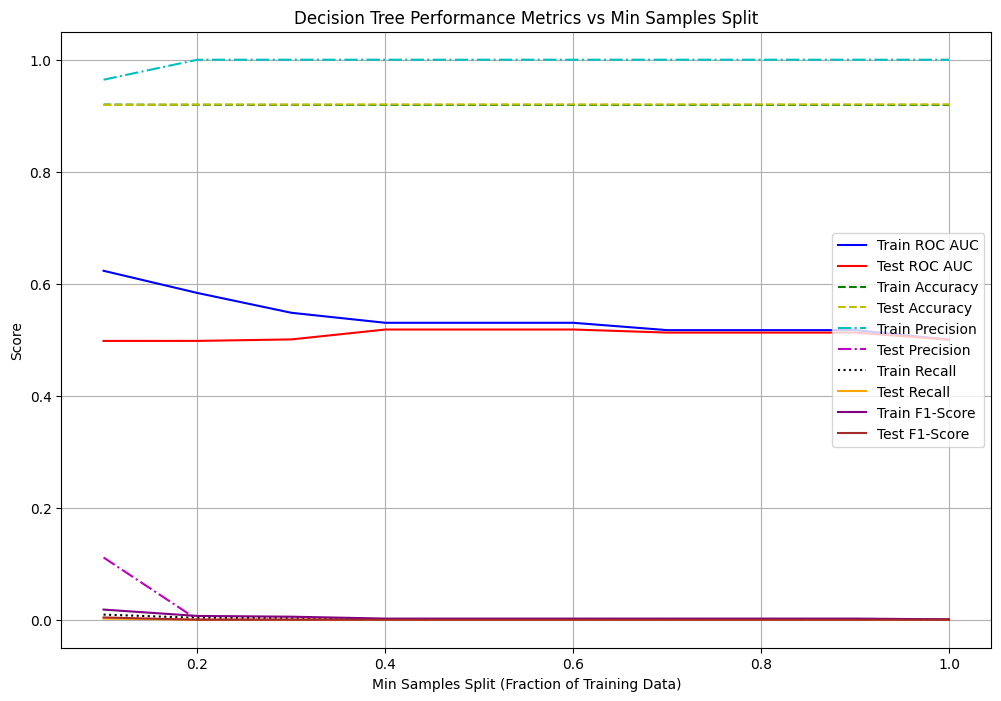

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of min_samples_split values
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each min_samples_split value
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=int(min_samples_split * len(X_train)), random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.plot(min_samples_splits, train_results['roc_auc'], 'b', label='Train ROC AUC')
plt.plot(min_samples_splits, test_results['roc_auc'], 'r', label='Test ROC AUC')

# Plot Accuracy
plt.plot(min_samples_splits, train_results['accuracy'], 'g--', label='Train Accuracy')
plt.plot(min_samples_splits, test_results['accuracy'], 'y--', label='Test Accuracy')

# Plot Precision
plt.plot(min_samples_splits, train_results['precision'], 'c-.', label='Train Precision')
plt.plot(min_samples_splits, test_results['precision'], 'm-.', label='Test Precision')

# Plot Recall
plt.plot(min_samples_splits, train_results['recall'], 'k:', label='Train Recall')
plt.plot(min_samples_splits, test_results['recall'], 'orange', label='Test Recall')

# Plot F1-Score
plt.plot(min_samples_splits, train_results['f1'], 'purple', label='Train F1-Score')
plt.plot(min_samples_splits, test_results['f1'], 'brown', label='Test F1-Score')

# Add labels and legend
plt.xlabel('Min Samples Split (Fraction of Training Data)')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Min Samples Split')
plt.legend(loc='best')
plt.grid()
plt.show()

Underfit, tapi mendekati

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the range of min_samples_split values
min_samples_splits = [0.2, 0.4]

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each min_samples_split value
for min_samples_split in min_samples_splits:
    print(f"\nEvaluating min_samples_split={min_samples_split}")
    dt = DecisionTreeClassifier(min_samples_split=int(min_samples_split * len(X_train)), random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_accuracy = accuracy_score(y_tr, train_pred)
        train_precision = precision_score(y_tr, train_pred, zero_division=0)
        train_recall = recall_score(y_tr, train_pred, zero_division=0)
        train_f1 = f1_score(y_tr, train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_tr, train_prob)
        
        # Store training metrics
        train_results['accuracy'].append(train_accuracy)
        train_results['precision'].append(train_precision)
        train_results['recall'].append(train_recall)
        train_results['f1'].append(train_f1)
        train_results['roc_auc'].append(train_roc_auc)
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        val_accuracy = accuracy_score(y_val, val_pred)
        val_precision = precision_score(y_val, val_pred, zero_division=0)
        val_recall = recall_score(y_val, val_pred, zero_division=0)
        val_f1 = f1_score(y_val, val_pred, zero_division=0)
        val_roc_auc = roc_auc_score(y_val, val_prob)
        
        # Store validation metrics
        test_results['accuracy'].append(val_accuracy)
        test_results['precision'].append(val_precision)
        test_results['recall'].append(val_recall)
        test_results['f1'].append(val_f1)
        test_results['roc_auc'].append(val_roc_auc)
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")
        print(f"  Test Metrics:  Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}, ROC AUC={val_roc_auc:.4f}")

    # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating min_samples_split=0.2
Fold 1
  Train Metrics: Accuracy=0.9195, Precision=0.8824, Recall=0.0056, F1=0.0112, ROC AUC=0.5799
  Test Metrics:  Accuracy=0.9185, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4860
Fold 2
  Train Metrics: Accuracy=0.9195, Precision=0.8095, Recall=0.0064, F1=0.0127, ROC AUC=0.5818
  Test Metrics:  Accuracy=0.9188, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4892
Fold 3
  Train Metrics: Accuracy=0.9193, Precision=1.0000, Recall=0.0023, F1=0.0045, ROC AUC=0.5541
  Test Metrics:  Accuracy=0.9188, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5046
Fold 4
  Train Metrics: Accuracy=0.9196, Precision=1.0000, Recall=0.0053, F1=0.0105, ROC AUC=0.5774
  Test Metrics:  Accuracy=0.9185, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4465
Fold 5
  Train Metrics: Accuracy=0.9195, Precision=0.8667, Recall=0.0049, F1=0.0097, ROC AUC=0.5776
  Test Metrics:  Accuracy=0.9188, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4522
F

#### Min samples leaf

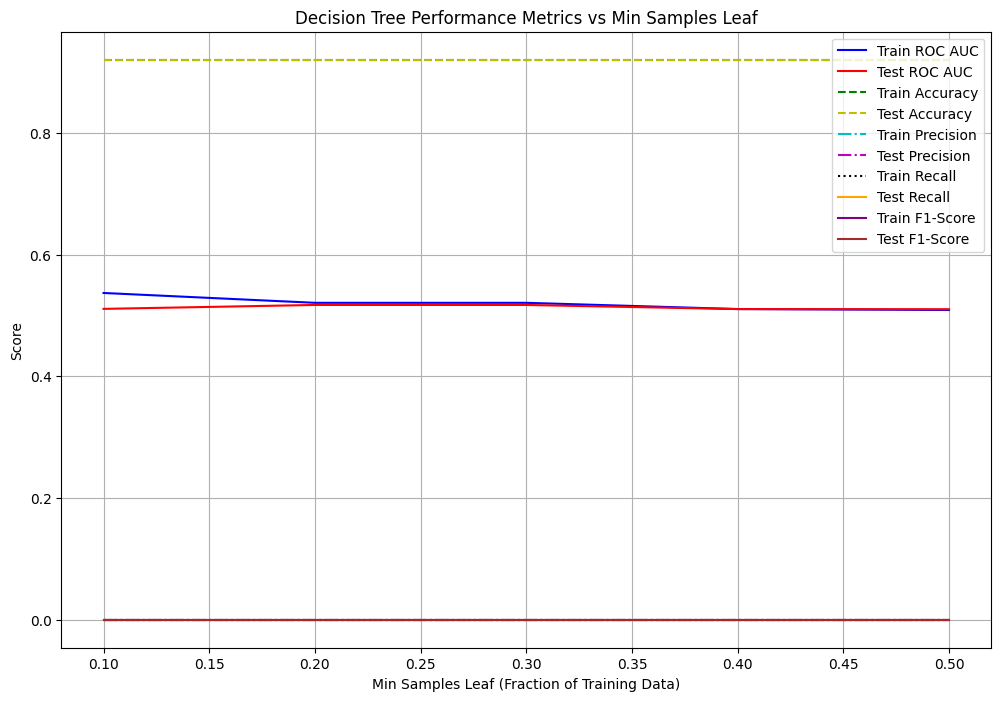

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of min_samples_leaf values
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each min_samples_leaf value
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=int(min_samples_leaf * len(X_train)), random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.plot(min_samples_leafs, train_results['roc_auc'], 'b', label='Train ROC AUC')
plt.plot(min_samples_leafs, test_results['roc_auc'], 'r', label='Test ROC AUC')

# Plot Accuracy
plt.plot(min_samples_leafs, train_results['accuracy'], 'g--', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results['accuracy'], 'y--', label='Test Accuracy')

# Plot Precision
plt.plot(min_samples_leafs, train_results['precision'], 'c-.', label='Train Precision')
plt.plot(min_samples_leafs, test_results['precision'], 'm-.', label='Test Precision')

# Plot Recall
plt.plot(min_samples_leafs, train_results['recall'], 'k:', label='Train Recall')
plt.plot(min_samples_leafs, test_results['recall'], 'orange', label='Test Recall')

# Plot F1-Score
plt.plot(min_samples_leafs, train_results['f1'], 'purple', label='Train F1-Score')
plt.plot(min_samples_leafs, test_results['f1'], 'brown', label='Test F1-Score')

# Add labels and legend
plt.xlabel('Min Samples Leaf (Fraction of Training Data)')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Min Samples Leaf')
plt.legend(loc='best')
plt.grid()
plt.show()

???


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the range of min_samples_leaf values
min_samples_leafs = [0.2, 0.3]

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each min_samples_leaf value
for min_samples_leaf in min_samples_leafs:
    print(f"\nEvaluating min_samples_leaf={min_samples_leaf}")
    dt = DecisionTreeClassifier(min_samples_leaf=int(min_samples_leaf * len(X_train)), random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_accuracy = accuracy_score(y_tr, train_pred)
        train_precision = precision_score(y_tr, train_pred, zero_division=0)
        train_recall = recall_score(y_tr, train_pred, zero_division=0)
        train_f1 = f1_score(y_tr, train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_tr, train_prob)
        
        # Store training metrics
        train_results['accuracy'].append(train_accuracy)
        train_results['precision'].append(train_precision)
        train_results['recall'].append(train_recall)
        train_results['f1'].append(train_f1)
        train_results['roc_auc'].append(train_roc_auc)
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        val_accuracy = accuracy_score(y_val, val_pred)
        val_precision = precision_score(y_val, val_pred, zero_division=0)
        val_recall = recall_score(y_val, val_pred, zero_division=0)
        val_f1 = f1_score(y_val, val_pred, zero_division=0)
        val_roc_auc = roc_auc_score(y_val, val_prob)
        
        # Store validation metrics
        test_results['accuracy'].append(val_accuracy)
        test_results['precision'].append(val_precision)
        test_results['recall'].append(val_recall)
        test_results['f1'].append(val_f1)
        test_results['roc_auc'].append(val_roc_auc)
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")
        print(f"  Test Metrics:  Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}, ROC AUC={val_roc_auc:.4f}")

    # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating min_samples_leaf=0.2
Fold 1
  Train Metrics: Accuracy=0.9191, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5240
  Test Metrics:  Accuracy=0.9193, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5078
Fold 2
  Train Metrics: Accuracy=0.9191, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5262
  Test Metrics:  Accuracy=0.9193, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4897
Fold 3
  Train Metrics: Accuracy=0.9192, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5218
  Test Metrics:  Accuracy=0.9190, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5052
Fold 4
  Train Metrics: Accuracy=0.9192, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5208
  Test Metrics:  Accuracy=0.9190, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4819
Fold 5
  Train Metrics: Accuracy=0.9192, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5198
  Test Metrics:  Accuracy=0.9190, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5232
Fo

#### Max features

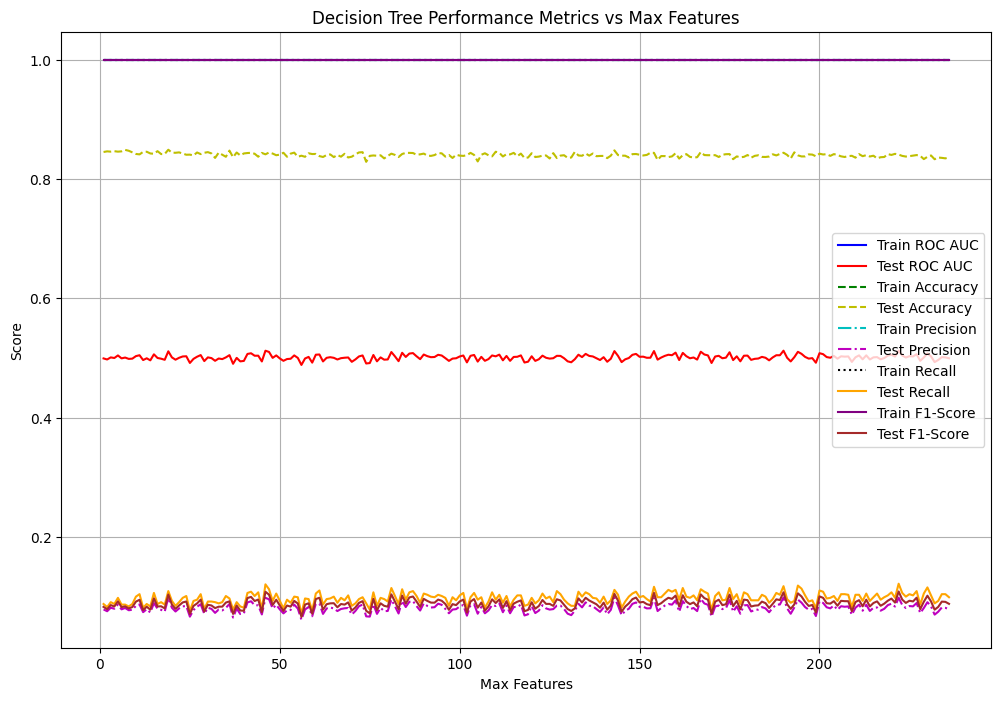

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of max_features values
max_features = list(range(1, X_train.shape[1] + 1))

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_features value
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature, random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.plot(max_features, train_results['roc_auc'], 'b', label='Train ROC AUC')
plt.plot(max_features, test_results['roc_auc'], 'r', label='Test ROC AUC')

# Plot Accuracy
plt.plot(max_features, train_results['accuracy'], 'g--', label='Train Accuracy')
plt.plot(max_features, test_results['accuracy'], 'y--', label='Test Accuracy')

# Plot Precision
plt.plot(max_features, train_results['precision'], 'c-.', label='Train Precision')
plt.plot(max_features, test_results['precision'], 'm-.', label='Test Precision')

# Plot Recall
plt.plot(max_features, train_results['recall'], 'k:', label='Train Recall')
plt.plot(max_features, test_results['recall'], 'orange', label='Test Recall')

# Plot F1-Score
plt.plot(max_features, train_results['f1'], 'purple', label='Train F1-Score')
plt.plot(max_features, test_results['f1'], 'brown', label='Test F1-Score')

# Add labels and legend
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Max Features')
plt.legend(loc='best')
plt.grid()
plt.show()


???

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the range of max_features values
max_features_values = [10, 'sqrt']

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_features value
for max_features in max_features_values:
    print(f"\nEvaluating max_features={max_features}")
    dt = DecisionTreeClassifier(max_features=max_features, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_accuracy = accuracy_score(y_tr, train_pred)
        train_precision = precision_score(y_tr, train_pred, zero_division=0)
        train_recall = recall_score(y_tr, train_pred, zero_division=0)
        train_f1 = f1_score(y_tr, train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_tr, train_prob)
        
        # Store training metrics
        train_results['accuracy'].append(train_accuracy)
        train_results['precision'].append(train_precision)
        train_results['recall'].append(train_recall)
        train_results['f1'].append(train_f1)
        train_results['roc_auc'].append(train_roc_auc)
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        val_accuracy = accuracy_score(y_val, val_pred)
        val_precision = precision_score(y_val, val_pred, zero_division=0)
        val_recall = recall_score(y_val, val_pred, zero_division=0)
        val_f1 = f1_score(y_val, val_pred, zero_division=0)
        val_roc_auc = roc_auc_score(y_val, val_prob)
        
        # Store validation metrics
        test_results['accuracy'].append(val_accuracy)
        test_results['precision'].append(val_precision)
        test_results['recall'].append(val_recall)
        test_results['f1'].append(val_f1)
        test_results['roc_auc'].append(val_roc_auc)
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")
        print(f"  Test Metrics:  Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}, ROC AUC={val_roc_auc:.4f}")

         # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating max_features=10
Fold 1
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8433, Precision=0.0838, Recall=0.0949, F1=0.0890, ROC AUC=0.5019
Fold 2
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8449, Precision=0.0904, Recall=0.1017, F1=0.0957, ROC AUC=0.5059
Fold 3
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8509, Precision=0.0836, Recall=0.0845, F1=0.0840, ROC AUC=0.5015
Fold 4
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8493, Precision=0.1125, Recall=0.1250, F1=0.1184, ROC AUC=0.5190
Fold 5
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8482, Precision=0.0782, Recall=0.0811, F1=0.0796, ROC AUC=0.4984
Fold 6


#### Max leaf nodes

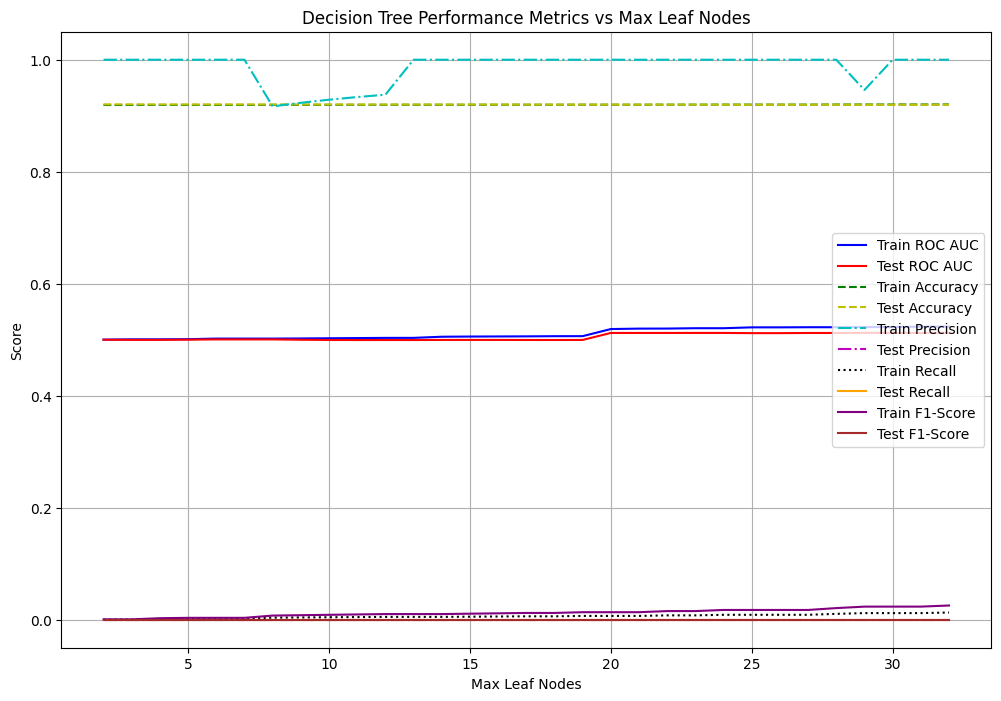

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of max_leaf_nodes values
max_leaf_nodes = np.linspace(2, 32, 31, endpoint=True, dtype=int)

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_leaf_nodes value
for max_leaf_node in max_leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_node, random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.plot(max_leaf_nodes, train_results['roc_auc'], 'b', label='Train ROC AUC')
plt.plot(max_leaf_nodes, test_results['roc_auc'], 'r', label='Test ROC AUC')

# Plot Accuracy
plt.plot(max_leaf_nodes, train_results['accuracy'], 'g--', label='Train Accuracy')
plt.plot(max_leaf_nodes, test_results['accuracy'], 'y--', label='Test Accuracy')

# Plot Precision
plt.plot(max_leaf_nodes, train_results['precision'], 'c-.', label='Train Precision')
plt.plot(max_leaf_nodes, test_results['precision'], 'm-.', label='Test Precision')

# Plot Recall
plt.plot(max_leaf_nodes, train_results['recall'], 'k:', label='Train Recall')
plt.plot(max_leaf_nodes, test_results['recall'], 'orange', label='Test Recall')

# Plot F1-Score
plt.plot(max_leaf_nodes, train_results['f1'], 'purple', label='Train F1-Score')
plt.plot(max_leaf_nodes, test_results['f1'], 'brown', label='Test F1-Score')

# Add labels and legend
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Max Leaf Nodes')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the range of max_leaf_nodes values
max_leaf_nodes_values = [20, 25]

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each max_leaf_nodes value
for max_leaf_nodes in max_leaf_nodes_values:
    print(f"\nEvaluating max_leaf_nodes={max_leaf_nodes}")
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_accuracy = accuracy_score(y_tr, train_pred)
        train_precision = precision_score(y_tr, train_pred, zero_division=0)
        train_recall = recall_score(y_tr, train_pred, zero_division=0)
        train_f1 = f1_score(y_tr, train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_tr, train_prob)
        
        # Store training metrics
        train_results['accuracy'].append(train_accuracy)
        train_results['precision'].append(train_precision)
        train_results['recall'].append(train_recall)
        train_results['f1'].append(train_f1)
        train_results['roc_auc'].append(train_roc_auc)
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        val_accuracy = accuracy_score(y_val, val_pred)
        val_precision = precision_score(y_val, val_pred, zero_division=0)
        val_recall = recall_score(y_val, val_pred, zero_division=0)
        val_f1 = f1_score(y_val, val_pred, zero_division=0)
        val_roc_auc = roc_auc_score(y_val, val_prob)
        
        # Store validation metrics
        test_results['accuracy'].append(val_accuracy)
        test_results['precision'].append(val_precision)
        test_results['recall'].append(val_recall)
        test_results['f1'].append(val_f1)
        test_results['roc_auc'].append(val_roc_auc)
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")
        print(f"  Test Metrics:  Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}, ROC AUC={val_roc_auc:.4f}")

     # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating max_leaf_nodes=20
Fold 1
  Train Metrics: Accuracy=0.9198, Precision=0.9200, Recall=0.0086, F1=0.0171, ROC AUC=0.5226
  Test Metrics:  Accuracy=0.9193, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5089
Fold 2
  Train Metrics: Accuracy=0.9197, Precision=0.8846, Recall=0.0086, F1=0.0171, ROC AUC=0.5382
  Test Metrics:  Accuracy=0.9188, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.5058
Fold 3
  Train Metrics: Accuracy=0.9199, Precision=0.8966, Recall=0.0098, F1=0.0193, ROC AUC=0.5192
  Test Metrics:  Accuracy=0.9177, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4907
Fold 4
  Train Metrics: Accuracy=0.9198, Precision=1.0000, Recall=0.0079, F1=0.0157, ROC AUC=0.5159
  Test Metrics:  Accuracy=0.9188, Precision=0.0000, Recall=0.0000, F1=0.0000, ROC AUC=0.4813
Fold 5
  Train Metrics: Accuracy=0.9198, Precision=0.8846, Recall=0.0086, F1=0.0171, ROC AUC=0.5152
  Test Metrics:  Accuracy=0.9188, Precision=0.3333, Recall=0.0034, F1=0.0067, ROC AUC=0.4987
Fold 

#### Criterion

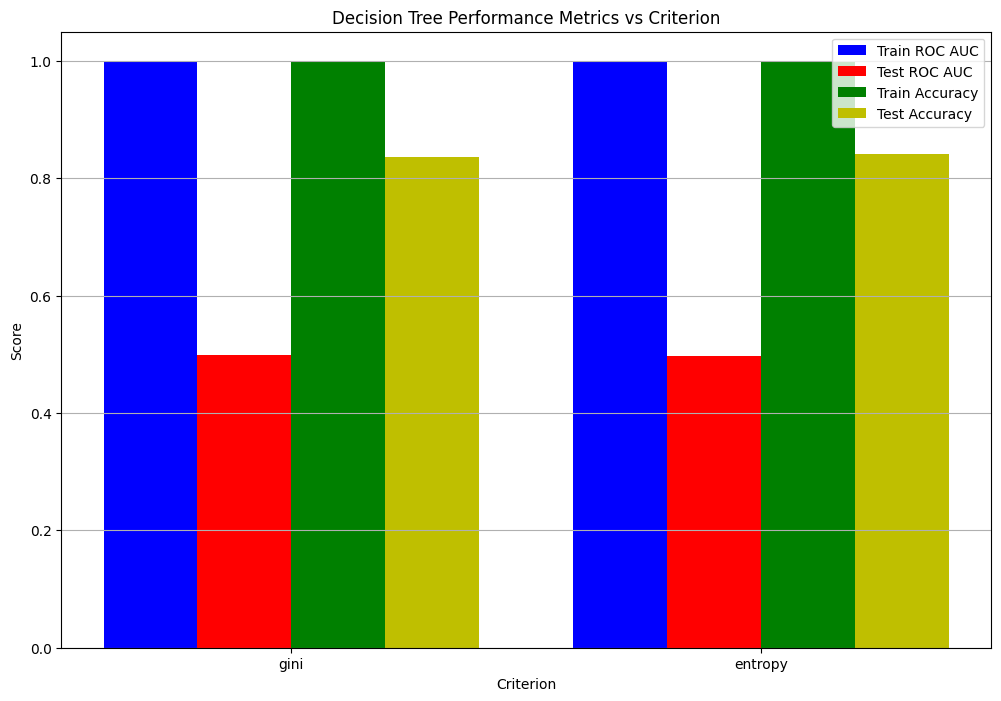

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the range of criterion values
criteria = ['gini', 'entropy']

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each criterion value
for criterion in criteria:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X_train, y_train)
    
    # Predictions on training data
    train_pred = dt.predict(X_train)
    train_prob = dt.predict_proba(X_train)[:, 1]
    
    # Calculate metrics for training data
    train_results['accuracy'].append(accuracy_score(y_train, train_pred))
    train_results['precision'].append(precision_score(y_train, train_pred, zero_division=0))
    train_results['recall'].append(recall_score(y_train, train_pred, zero_division=0))
    train_results['f1'].append(f1_score(y_train, train_pred, zero_division=0))
    train_results['roc_auc'].append(roc_auc_score(y_train, train_prob))
    
    # Predictions on testing data
    test_pred = dt.predict(X_test)
    test_prob = dt.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for testing data
    test_results['accuracy'].append(accuracy_score(y_test, test_pred))
    test_results['precision'].append(precision_score(y_test, test_pred, zero_division=0))
    test_results['recall'].append(recall_score(y_test, test_pred, zero_division=0))
    test_results['f1'].append(f1_score(y_test, test_pred, zero_division=0))
    test_results['roc_auc'].append(roc_auc_score(y_test, test_prob))

# Plot the results
x = np.arange(len(criteria))  # X-axis positions for the criteria

plt.figure(figsize=(12, 8))

# Plot ROC AUC
plt.bar(x - 0.3, train_results['roc_auc'], width=0.2, label='Train ROC AUC', color='b')
plt.bar(x - 0.1, test_results['roc_auc'], width=0.2, label='Test ROC AUC', color='r')

# Plot Accuracy
plt.bar(x + 0.1, train_results['accuracy'], width=0.2, label='Train Accuracy', color='g')
plt.bar(x + 0.3, test_results['accuracy'], width=0.2, label='Test Accuracy', color='y')

# Add labels and legend
plt.xticks(x, criteria)
plt.xlabel('Criterion')
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics vs Criterion')
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Define the range of criterion values
criteria = ['gini', 'entropy']

# Initialize lists to store results
train_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Loop through each criterion value
for criterion in criteria:
    print(f"\nEvaluating criterion={criterion}")
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
        # Split the data for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        dt.fit(X_tr, y_tr)
        
        # Predictions on training fold
        train_pred = dt.predict(X_tr)
        train_prob = dt.predict_proba(X_tr)[:, 1]
        
        # Calculate metrics for training fold
        train_results['accuracy'].append(accuracy_score(y_tr, train_pred))
        train_results['precision'].append(precision_score(y_tr, train_pred, zero_division=0))
        train_results['recall'].append(recall_score(y_tr, train_pred, zero_division=0))
        train_results['f1'].append(f1_score(y_tr, train_pred, zero_division=0))
        train_results['roc_auc'].append(roc_auc_score(y_tr, train_prob))
        
        # Predictions on validation fold
        val_pred = dt.predict(X_val)
        val_prob = dt.predict_proba(X_val)[:, 1]
        
        # Calculate metrics for validation fold
        test_results['accuracy'].append(accuracy_score(y_val, val_pred))
        test_results['precision'].append(precision_score(y_val, val_pred, zero_division=0))
        test_results['recall'].append(recall_score(y_val, val_pred, zero_division=0))
        test_results['f1'].append(f1_score(y_val, val_pred, zero_division=0))
        test_results['roc_auc'].append(roc_auc_score(y_val, val_prob))
        
        # Print metrics for the current fold
        print(f"Fold {fold}")
        print(f"  Train Metrics: Accuracy={train_results['accuracy'][-1]:.4f}, Precision={train_results['precision'][-1]:.4f}, Recall={train_results['recall'][-1]:.4f}, F1={train_results['f1'][-1]:.4f}, ROC AUC={train_results['roc_auc'][-1]:.4f}")
        print(f"  Test Metrics:  Accuracy={test_results['accuracy'][-1]:.4f}, Precision={test_results['precision'][-1]:.4f}, Recall={test_results['recall'][-1]:.4f}, F1={test_results['f1'][-1]:.4f}, ROC AUC={test_results['roc_auc'][-1]:.4f}")

    # Calculate and print mean and standard deviation for each metric
    train_df = pd.DataFrame(train_results)
    test_df = pd.DataFrame(test_results)

    summary = {
        'Train Mean': train_df.mean(),
        'Train Std': train_df.std(),
        'Test Mean': test_df.mean(),
        'Test Std': test_df.std()
    }

    summary_df = pd.DataFrame(summary)
    print("\nSummary of 10-Fold Cross-Validation Metrics:")
    print(summary_df.round(4))



Evaluating criterion=gini
Fold 1
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8438, Precision=0.0965, Recall=0.1119, F1=0.1036, ROC AUC=0.5100
Fold 2
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8425, Precision=0.0806, Recall=0.0915, F1=0.0857, ROC AUC=0.4999
Fold 3
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8373, Precision=0.0836, Recall=0.1014, F1=0.0916, ROC AUC=0.5017
Fold 4
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8353, Precision=0.0552, Recall=0.0642, F1=0.0594, ROC AUC=0.4837
Fold 5
  Train Metrics: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000, ROC AUC=1.0000
  Test Metrics:  Accuracy=0.8373, Precision=0.0926, Recall=0.1149, F1=0.1026, ROC AUC=0.5079
Fold 6
 

## Make the best model

#### Test the best model with full training data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(max_depth=14, 
                                  min_samples_split=0.4,
                                  min_samples_leaf=0.2,
                                  max_features=10,
                                  max_leaf_nodes=25,
                                  criterion='entropy'
                                  )
dt_model.fit(X, y)

# Predictions on training fold
train_pred = dt_model.predict(X)
train_prob = dt_model.predict_proba(X)[:, 1]

# Generate classification report for the test set
print(classification_report(y, test_pred))

# # Calculate metrics for training fold
# train_accuracy = accuracy_score(y, train_pred)
# train_precision = precision_score(y, train_pred, zero_division=0)
# train_recall = recall_score(y, train_pred, zero_division=0)
# train_f1 = f1_score(y, train_pred, zero_division=0)
# train_roc_auc = roc_auc_score(y, train_prob)

# print(f"Train Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, ROC AUC={train_roc_auc:.4f}")

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     44817
         1.0       0.00      0.00      0.00      3927

    accuracy                           0.92     48744
   macro avg       0.46      0.50      0.48     48744
weighted avg       0.85      0.92      0.88     48744



c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

#### Test the best model with test data

In [ ]:

y_pred = dt_model.predict(test_df)
y_pred_proba = dt_model.predict_proba(test_df)[:, 1]

from sklearn.model_selection import cross_validate

# Evaluate multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(dt_model, test_df, y_pred, cv=10, scoring=scoring)

# Print results
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean():.4f}")


c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Precision scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean precision: 0.0000
Recall scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean recall: 0.0000
F1 scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean f1: 0.0000
Roc_auc scores: [nan nan nan nan nan nan nan nan nan nan]
Mean roc_auc: nan


c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naufalmaula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

https://stackoverflow.com/questions/45681387/predict-test-data-using-model-based-on-training-data-set

### Test